In [161]:
import pandas as pd
from plotnine import *
from scipy.stats import chi2_contingency, ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

- **NOME:** Pedro Luís Azevedo Costa
- **RA:** 175857

# IA376M - Exercício Individual

# Dataset

O *dataset* utilizado neste trabalho foi o **"Titanic: Machine Learning from Disaster"**, retirado do *Kaggle*, conforme este [link](https://www.kaggle.com/competitions/titanic/data). Este *dataset* contém informações sobre tripulantes do *Titanic*, como classe social, indicando quais deles sobreviveram ao naufrágio.

# Perguntas

Este trabalho tem como objetivo responder as seguintes perguntas através da análise exploratória de dados (EDA):
- **Quais fatores influenciaram mais a sobrevivência no naufrágio?**
    - O efeito da idade ou gênero na probabilidade de sobrevivência?
    - Qual a relação entre classe social e sobrevivência?

# Etapas:
1. Carregamento de dados
1. Base teórica
1. Análise exploratória de dados (EDA)
1. Conclusão

## Carregamento de dados

In [162]:
path_dataset = "./titanic/train.csv"
df_titanic = pd.read_csv(path_dataset)


# Mostre as primeiras linhas do dataset
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Conforme tabela acima, temos um total de 12 colunas. A tabela abaixo descreve detalhadamente o que é cada campo.

| Coluna       | Descrição                                                                 | Tipo de Dado  |
|--------------|---------------------------------------------------------------------------|---------------|
| `PassengerId`| Identificador único para cada passageiro.                                 | `int64`       |
| `Survived`   | Indica se o passageiro sobreviveu (1) ou não (0).                         | `int64`       |
| `Pclass`     | Classe do ticket do passageiro (1 = 1ª classe, 2 = 2ª classe, 3 = 3ª classe). | `int64`       |
| `Name`       | Nome completo do passageiro.                                              | `object`      |
| `Sex`        | Sexo do passageiro (male ou female).                                      | `object`      |
| `Age`        | Idade do passageiro em anos (pode conter valores nulos).                  | `float64`     |
| `SibSp`      | Número de irmãos/cônjuges a bordo.                                        | `int64`       |
| `Parch`      | Número de pais/filhos a bordo.                                            | `int64`       |
| `Ticket`     | Número do bilhete do passageiro.                                          | `object`      |
| `Fare`       | Valor pago pela passagem.                                                 | `float64`     |
| `Cabin`      | Número da cabine do passageiro (pode conter valores nulos).               | `object`      |
| `Embarked`   | Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).       | `object`      |


Nesta análise, desconsideraremos as colunas `PassengerId`, `Ticket` e `Cabin`.

## Base Teórica


### Teste Qui-Quadrado (Chi²)

O **teste qui-quadrado** é uma técnica estatística usada para verificar se há uma relação significativa entre duas variáveis categóricas. Ele compara as frequências que observamos em uma tabela com as que esperaríamos encontrar caso não houvesse relação entre essas variáveis.

#### Quando Usar
Este teste é ideal quando você tem **duas variáveis categóricas** e quer saber se uma delas influencia a outra. Por exemplo, ao analisar a relação entre gênero (masculino/feminino) e sobrevivência no Titanic (sobreviveu/não sobreviveu), ambas sendo variáveis categóricas.

#### Como Funciona
1. **Hipótese nula (H₀)**: Assume que não há relação entre as variáveis.
2. **Hipótese alternativa (H₁)**: Assume que existe uma relação significativa.

#### Processo
Comparamos as **frequências observadas** (o que realmente aconteceu) com as **frequências esperadas** (o que seria esperado caso não houvesse relação). Se a diferença for grande o suficiente, podemos dizer que existe uma associação entre as variáveis.

#### Exemplo de Aplicação
Um exemplo de aplicação seria testar a relação entre gênero e sobrevivência no Titanic. As frequências de sobreviventes e não sobreviventes são organizadas por gênero, calculam-se as frequências esperadas, e o teste é aplicado para verificar se há uma associação significativa entre essas variáveis.

### Teste t de Student (t-test)

O **teste t de Student** é utilizado para comparar as médias de dois grupos e verificar se existe uma diferença significativa entre elas. Ele é apropriado quando a variável de interesse é **contínua** e se deseja avaliar se as médias de dois grupos (ou amostras) são estatisticamente diferentes.

#### Quando Usar
O teste t é aplicado quando:
- Existem **duas amostras** e o objetivo é comparar suas médias.
- A variável analisada é contínua (ex: idade, altura, peso).
- Deseja-se testar a diferença entre dois grupos independentes ou amostras pareadas.


#### Como Funciona
1. **Hipótese nula (H₀)**: Não há diferença significativa entre as médias dos dois grupos.
2. **Hipótese alternativa (H₁)**: Existe uma diferença significativa entre as médias dos dois grupos.

#### Processo de Cálculo
O teste t calcula a estatística t a partir da diferença entre as médias das amostras e suas variâncias. Esse valor t é então comparado com um valor crítico da **distribuição t de Student**, considerando os graus de liberdade baseados no tamanho das amostras. Se o valor calculado for maior que o valor crítico, rejeita-se a hipótese nula.

#### Exemplo de Aplicação
Um exemplo seria testar se a idade média dos passageiros que sobreviveram no Titanic é diferente da idade média dos que não sobreviveram. O teste t pode ser utilizado para comparar essas duas médias e determinar se a diferença é estatisticamente significativa.

### O que são p-values?

O **p-value** (ou p-valor) é uma medida que ajuda a determinar a significância estatística de um teste de hipótese. Ele representa a probabilidade de observarmos os resultados obtidos (ou algo ainda mais extremo) assumindo que a hipótese nula (**H₀**) seja verdadeira.

#### Interpretação
- Um **p-value baixo** indica que os dados observados são improváveis sob a hipótese nula. Portanto, se o p-value for suficientemente baixo, podemos **rejeitar a hipótese nula**.
- Um **p-value alto** sugere que os dados observados são consistentes com a hipótese nula, ou seja, **não há evidência suficiente para rejeitar H₀**.

### Valores de Interesse

Na prática, os valores de p-value são comparados com um nível de significância (**α**, alpha), que é o limiar que define se rejeitamos ou não a hipótese nula. Comumente, são utilizados os seguintes níveis de significância:

- **α = 0,05 (5%)**: Este é o valor de corte mais comum. Se o p-value for menor que 0,05, rejeitamos a hipótese nula com 95% de confiança.
- **α = 0,01 (1%)**: Nível de significância mais rigoroso. Um p-value abaixo de 0,01 indica forte evidência contra a hipótese nula.
- **α = 0,10 (10%)**: Um limiar menos rigoroso. Utilizado em situações onde se aceita uma maior chance de erro tipo I (falso positivo).

### Como Usar os p-values na Validação de Hipóteses

1. **Estabelecer a hipótese nula (H₀)**: Assume que não há efeito ou diferença significativa.
2. **Calcular o p-value** com base nos dados observados.
3. **Comparar o p-value com o nível de significância (α)**:
   - Se o **p-value ≤ α**, rejeitamos a hipótese nula (há uma diferença significativa).
   - Se o **p-value > α**, não rejeitamos a hipótese nula (não há evidência suficiente para sugerir uma diferença significativa).


## Análise Exploratória de Dados (EDA)

In [163]:
# Conta o número de linhas e colunas
shape = df_titanic.shape
print(f"O dataset possui {shape[0]} linhas e {shape[1]} colunas")

O dataset possui 891 linhas e 12 colunas


### Tratamento de dados faltantes

In [164]:
# Conta o número de dados faltantes por coluna
missing = df_titanic.isnull().sum()
print("Dados faltantes por coluna:")
print(missing)

Dados faltantes por coluna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### Tratamento da coluna Cabin
- A coluna cabin possui muitos valores faltantes (apenas 204 de 891 estão preenchidos). Neste caso, esta característica será simplesmente descartada.

#### Tratamento da coluna Embarked
- Aqui, apenas duas linhas tem dados faltantes. Como o volume de dados ausnetes é pequeno, preencheremos com o valor mais comum (moda).

#### Tratamento da coluna Age
- A coluna Age contém valores ausentes que precisam ser tratados, já que a idade é uma variável relevante na análise de sobrevivência.
- Optamos por preencher os valores faltantes através de **imputação por grupos**, onde a mediana da idade será calculada com base em **gênero** e **classe do ticket**. Isso permite uma imputação mais precisa e condizente com as características dos passageiros.
- Além disso, criaremos uma nova variável que agrupa a idade em **faixas etárias** (ex.: criança, jovem, adulto, idoso). Essa abordagem permite uma melhor interpretação da influência da idade na sobrevivência, especialmente em análises descritivas e comparativas.

In [165]:
# Remove a coluna Cabin (se existir)
if "Cabin" in df_titanic.columns:
    df_titanic = df_titanic.drop(columns=["Cabin"])

# Inputa a moda na coluna Embarked
moda_embarked = df_titanic["Embarked"].mode()[0]
print(f"Moda de Embarked: {moda_embarked}")
df_titanic["Embarked"] = df_titanic["Embarked"].fillna(moda_embarked)

# Salva uma cópia do dataset sem inputar a idade
df_titanic_sem_idade_na = df_titanic.loc[~df_titanic["Age"].isna()].copy(deep=True)

# Inputa a mediana por grupo na coluna Age
df_titanic['Age'] = df_titanic.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
df_titanic['AgeGroup'] = pd.cut(df_titanic['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Criança', 'Adolescente', 'Adulto Jovem', 'Adulto', 'Idoso'])

df_titanic_sem_idade_na['AgeGroup'] = pd.cut(df_titanic_sem_idade_na['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Criança', 'Adolescente', 'Adulto Jovem', 'Adulto', 'Idoso'])




Moda de Embarked: S


In [166]:
# Validação final para checar se ainda existem dados faltantes
missing = df_titanic.isnull().sum()
print("Dados faltantes por coluna:")
print(missing)

Dados faltantes por coluna:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
AgeGroup       0
dtype: int64


Visto que o tratamento do campo `Age` foi o mais agressivo, é prudente avaliar como a distribuição dos dados originais se compara com a dos dados tratados.

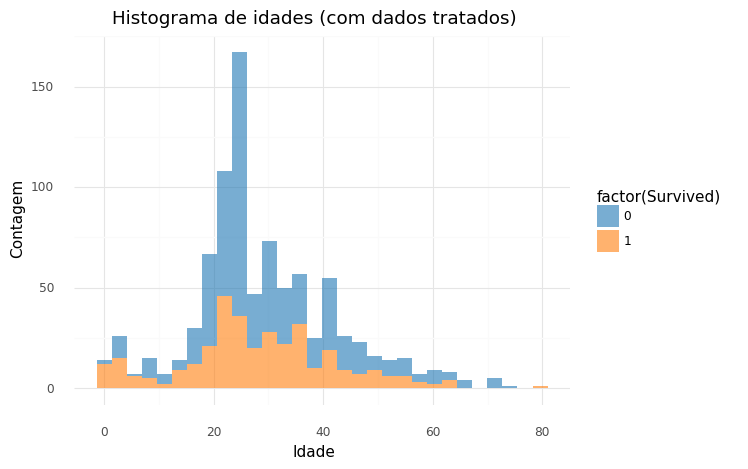

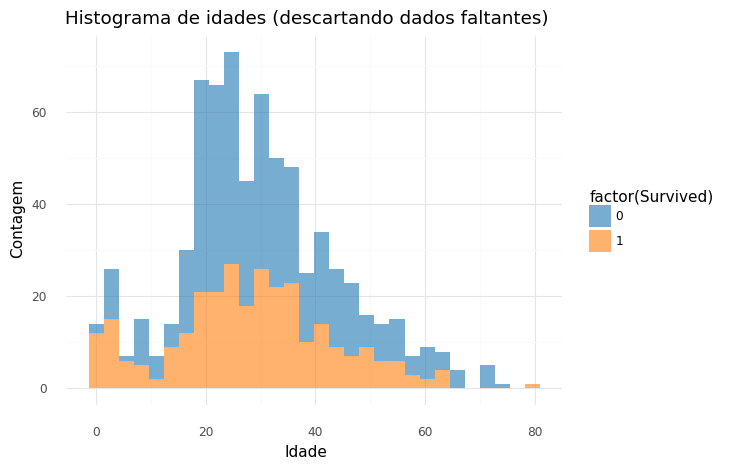

In [167]:
# Plota o histograma de idades com ggplot

plot1 = (
    ggplot(df_titanic, aes(x="Age", fill="factor(Survived)"))
    + geom_histogram(bins=30, alpha=0.6)
    + theme_minimal()
    + scale_fill_manual(values=['#1f77b4', '#ff7f0e'])
    + labs(title="Histograma de idades (com dados tratados)", x="Idade", y="Contagem")
)


# Plota o histograma de idades com ggplot

plot2 = (
    ggplot(df_titanic_sem_idade_na, aes(x="Age", fill="factor(Survived)"))
    + geom_histogram(bins=30, alpha=0.6)
    + theme_minimal()
    + scale_fill_manual(values=['#1f77b4', '#ff7f0e'])
    + labs(title="Histograma de idades (descartando dados faltantes)", x="Idade", y="Contagem")
)

print(plot1)

print(plot2)

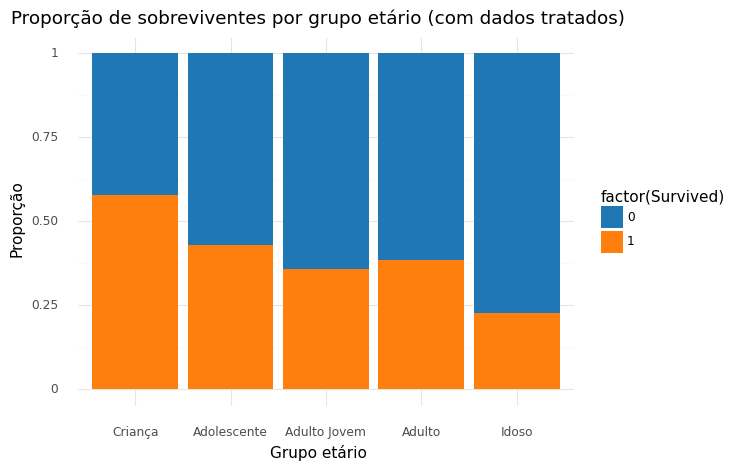

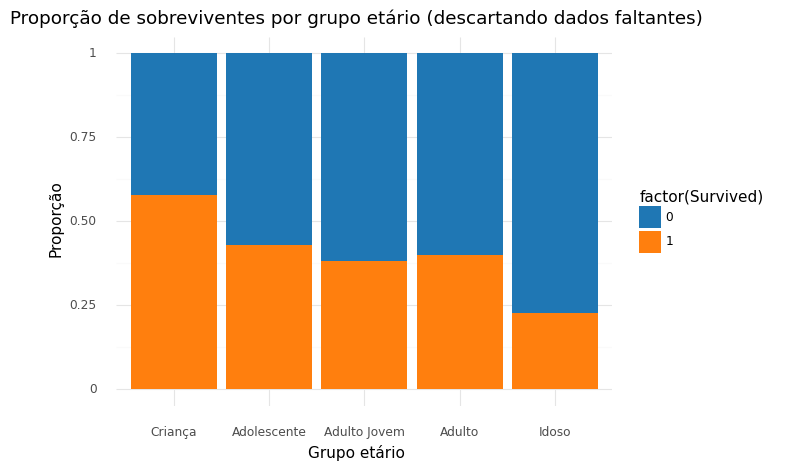

In [168]:
# Plota um gráfico de barras mostrando a quantidade de sobreviventes por AgeGroup em porcentagem

plot = (
    ggplot(df_titanic, aes(x="AgeGroup", fill="factor(Survived)"))
    + geom_bar(position="fill")
    + theme_minimal()
    + scale_fill_manual(values=['#1f77b4', '#ff7f0e'])
    + labs(title="Proporção de sobreviventes por grupo etário (com dados tratados)", x="Grupo etário", y="Proporção")
)
print(plot)

plot = (
    ggplot(df_titanic_sem_idade_na, aes(x="AgeGroup", fill="factor(Survived)"))
    + geom_bar(position="fill")
    + theme_minimal()
    + scale_fill_manual(values=['#1f77b4', '#ff7f0e'])
    + labs(title="Proporção de sobreviventes por grupo etário (descartando dados faltantes)", x="Grupo etário", y="Proporção")
)
print(plot)

**COMENTÁRIOS:**

Os histogramas apresentaram formatos bem semelhantes.

As distriuições de grupos etários ficaram praticamente identicas.

O tratamento empregado nos dados faltantes de idade aparenta ter sido adequado.

---

### Avaliação das Estatísticas do *Dataset*

In [169]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.112424,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.304424,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.500000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


---

### Visualização de Gráficos de Violino em Variáveis Contínuas

A fim de complementar a visualização das estatísticas conforme dataframe acima, foi realizada a plotagem de gráficos de violino a partir das variáveis contíuas do *Dataset* de modo a mostrar de maneira rápida e superficial como é a distribuição dos dados.

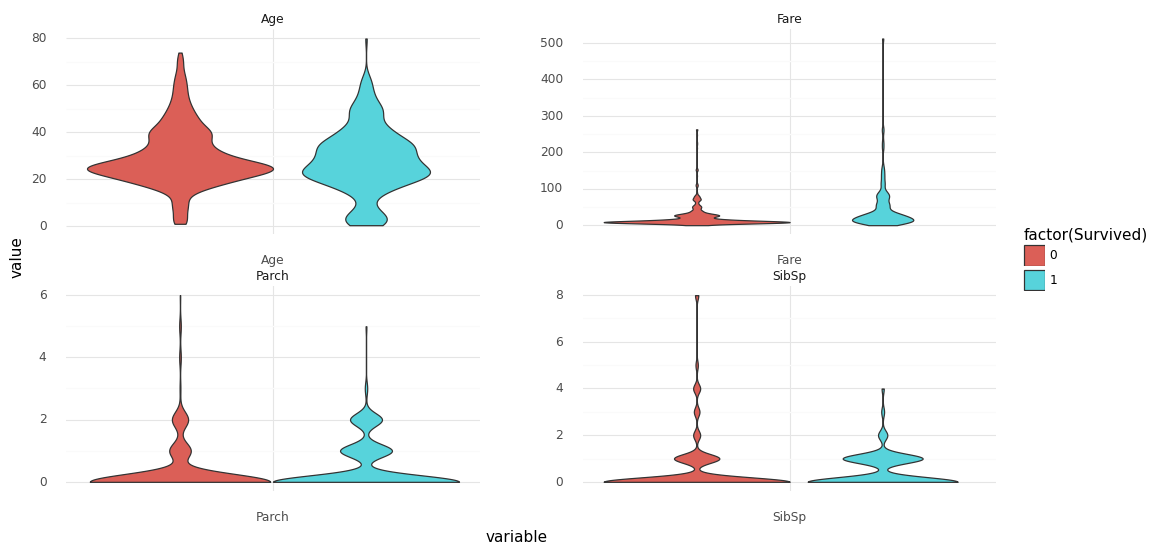

<ggplot: (820969358)>

In [170]:
df_titanic_melted = df_titanic.melt(value_vars=["Age", "SibSp", "Parch", "Fare"], id_vars="Survived")
(ggplot(df_titanic_melted, aes(x="variable", y="value", fill="factor(Survived)")) +
    geom_violin() +
    facet_wrap("~variable", scales="free") +
    theme_minimal() +
    theme(
        figure_size=(12, 6),
        subplots_adjust={'wspace': 0.25, 'hspace': 0.25}  # Ajuste os valores conforme necessário
    )
)


---
### Avaliação do Número de Outliers

In [171]:
# Plota o número de outliers por campo numérico pelo critério do IQR
def count_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series[(series < lower_bound) | (series > upper_bound)].count()

outliers = df_titanic[["Age", "SibSp", "Parch", "Fare"]].apply(count_outliers)
print("Número de outliers por campo:")
print(outliers)



Número de outliers por campo:
Age       33
SibSp     46
Parch    213
Fare     116
dtype: int64


In [172]:
# Calcula a proporçao de outliers por campo
total = df_titanic.shape[0]
outliers_prop = outliers / total * 100.0
print("Proporção de outliers por campo:")
print(outliers_prop)

Proporção de outliers por campo:
Age       3.703704
SibSp     5.162738
Parch    23.905724
Fare     13.019080
dtype: float64


- *Parch* é a variável com maior númeo de outliers, seguida de Fare.

---

### Avaliação da distribuição de sobreviventes e não sobreviventes

Número de sobreviventes (1 é sobrevevivente):
0    549
1    342
Name: Survived, dtype: int64
Proporção de sobreviventes em porcentagem (1 é sobrevevivente):
0    61.616162
1    38.383838
Name: Survived, dtype: float64


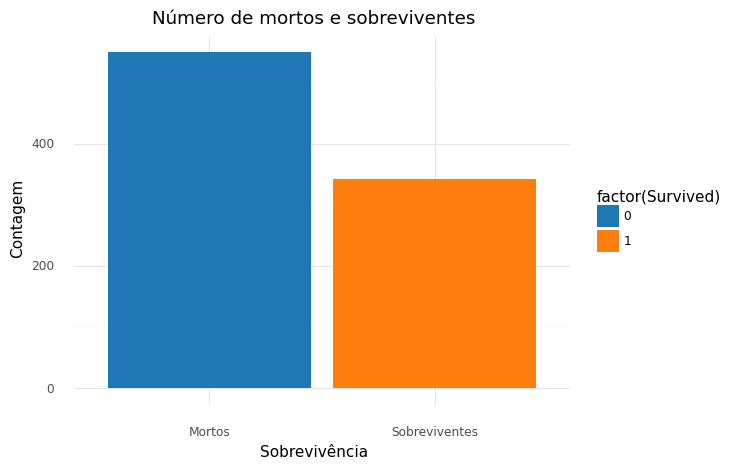

In [173]:
# Conta o número de sobreviventes e não sobreviventes
survived = df_titanic["Survived"].value_counts()
print("Número de sobreviventes (1 é sobrevevivente):")
print(survived)

# Calcula a proporção de sobreviventes e não sobreviventes
survived_prop = df_titanic["Survived"].value_counts(normalize=True) * 100.0
print("Proporção de sobreviventes em porcentagem (1 é sobrevevivente):")
print(survived_prop)

# Plota o número de sobreviventes e não sobreviventes
plot = (
    ggplot(df_titanic, aes(x="factor(Survived)", fill="factor(Survived)"))
    + geom_bar()
    + theme_minimal()
   #+ scale_fill_manual(values=["red", "blue"])  # Define cores específicas
    + scale_x_discrete(
        labels=["Mortos", "Sobreviventes"]
    )  # Rótulos personalizados
    + labs(
        title="Número de mortos e sobreviventes",
        x="Sobrevivência",
        y="Contagem",
    )
    + scale_fill_manual(values=['#1f77b4', '#ff7f0e'])
)

print(plot)

- 62% de mortos e 38% de sobreviventes
---

### Visualização de Variáveis e Avaliação de Influência na Sobrevivência

In [174]:
def plot_survival_barplot(df, category:str, title:str):
    """
        Plota um gráfico de barras empilhadas para a sobrevivência de uma categoria.
    """
    
    # Calcular os totais por sexo e sobrevivência
    total_df = df.groupby([category, 'Survived']).size().reset_index(name='Count')

    # Calcular o total de cada sexo
    sex_totals = total_df.groupby(category)['Count'].sum().reset_index(name='Total')
    total_df = total_df.merge(sex_totals, on=category)

    # Calcular a porcentagem
    total_df['Percentage'] = 100 * total_df['Count'] / total_df['Total']

    # Adicionar uma coluna para os rótulos formatados
    total_df['Label'] = total_df['Percentage'].apply(lambda x: '{:.1f}%'.format(x))

    # Calcula o número de valores únicos dentro da categoria
    unique_values = df[category].nunique()

    print(unique_values)

    # Adicionar uma linha para o total de cada sexo
    total_df_total = total_df.groupby(category).agg({'Total': 'sum', 'Percentage': 'sum'}).reset_index()
    total_df_total['Survived'] = 'Total'
    total_df_total['Count'] = total_df_total['Total'] / 2
    total_df_total['Percentage'] = 100  # Porcentagem total é 100%
    total_df_total['Label'] = '100.0%'  # Label para o total

    # Adicionar os totais ao DataFrame original
    combined_df = pd.concat([total_df, total_df_total], ignore_index=True)

    # Criar o gráfico com as porcentagens no topo das barras
    plot = (ggplot(combined_df, aes(x=category, y='Count', fill='factor(Survived)')) +
            geom_bar(stat='identity', position=position_dodge()) +
            labs(title=title, y='Count', x=category, fill='Survived') +
            scale_fill_manual(values=['#1f77b4', '#ff7f0e', '#2ca02c']) +
            geom_text(aes(label='Label'), position=position_dodge(width=0.9), va='bottom'))
    
    return plot    

---

#### Sobreviventes por Sexo 
- (Variável Categórica)

2


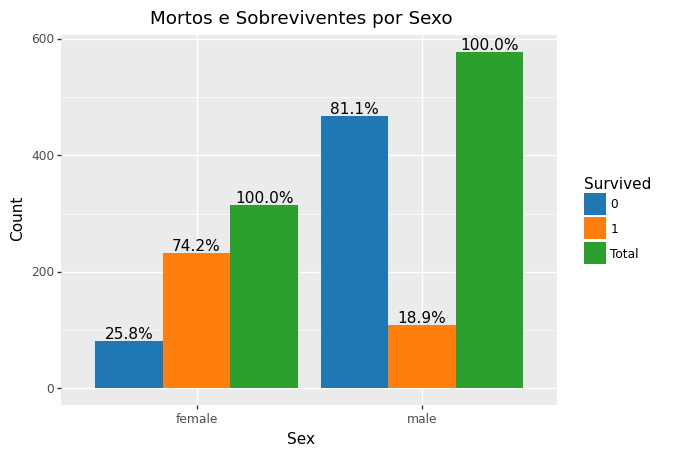

In [175]:
title = 'Mortos e Sobreviventes por Sexo'
category = 'Sex'

plot = plot_survival_barplot(df_titanic, category, title)
print(plot)


In [176]:
# Calculando o teste qui-quadrado entre Sex e Survived para avaliar o p-value

chi2_test_sex = chi2_contingency(pd.crosstab(df_titanic['Sex'], df_titanic['Survived']))

print(chi2_test_sex)

pvalue_sex = chi2_test_sex[1]



Chi2ContingencyResult(statistic=260.71702016732104, pvalue=1.1973570627755645e-58, dof=1, expected_freq=array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]]))


**COMENTÁRIOS**

O p-value encontrado vale aproximadamente 1.2e-58, indicando um resultado estatisticamente significativo.

Isso comprova que gênero tem influência na sobrevivência

---

#### Sobreviventes por Classe
- (Variável Categórica)

3


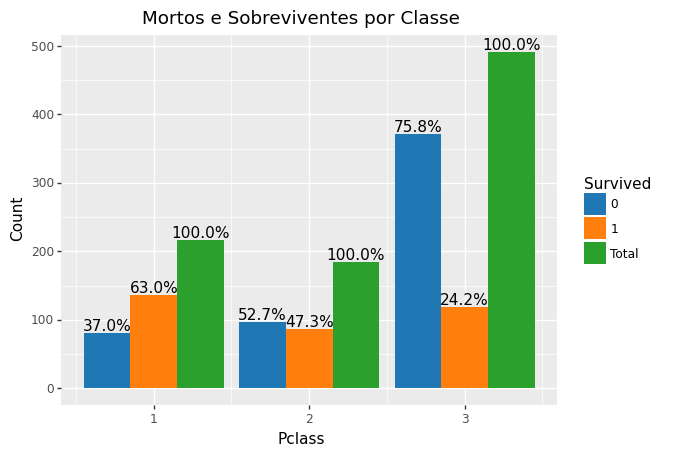

In [177]:
title = 'Mortos e Sobreviventes por Classe'
category = 'Pclass'

plot = plot_survival_barplot(df_titanic, category, title)
print(plot)


In [178]:
chi2_test_class = chi2_contingency(pd.crosstab(df_titanic['Pclass'], df_titanic['Survived']))

print(chi2_test_class)

pvalue_class = chi2_test_class[1]



Chi2ContingencyResult(statistic=102.88898875696056, pvalue=4.549251711298793e-23, dof=2, expected_freq=array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]]))


**COMENTÁRIOS**

O p-value encontrado foi de 4.55e-23, comprovando a significância estatística da variável classe.

Indivíduos de classes mais elevadas apresentam uma maior taxa de sobreviência os de classes inferiores.

Apesar de significativa, a influência de classe parece ser inferior à influência de sexo.

---

#### Avaliação Simultânea de Sobreviventes por Classe e Sexo

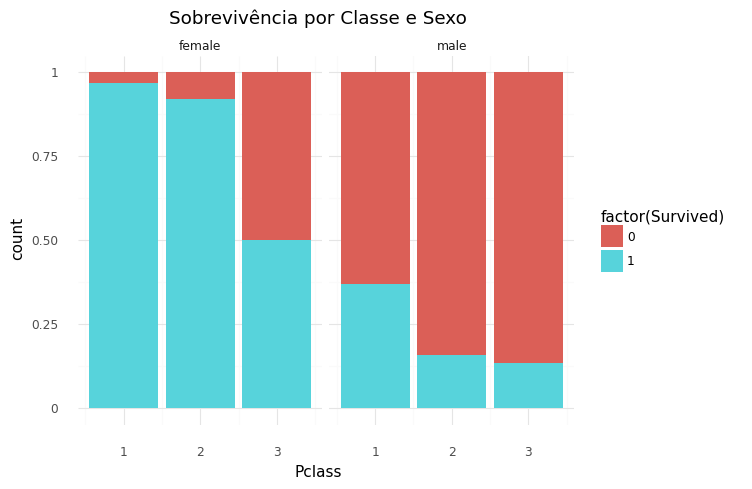

<ggplot: (821195764)>

In [179]:
(
    ggplot(df_titanic, aes(x="Pclass", fill="factor(Survived)"))
    + geom_bar(position="fill")
    + facet_wrap("~Sex")
    + theme_minimal()
    + labs(title="Sobrevivência por Classe e Sexo")
)


**COMENTÁRIOS:**

Mulheres da primeira e segunda classe possuem uma taxa de sobrevivência que beira os 100%.

Já para homens, é evidente que ser da primeira classe aumenta significativamente a taxa de sobrevivência, mas ainda assim ela é reduzida.

Não parece haver muita diferença na taxa de sobrevivência de homens da segunda e terceira classe.

---

#### Sobreviventes por Grupo de Idade
- (Variável Categórica)

5


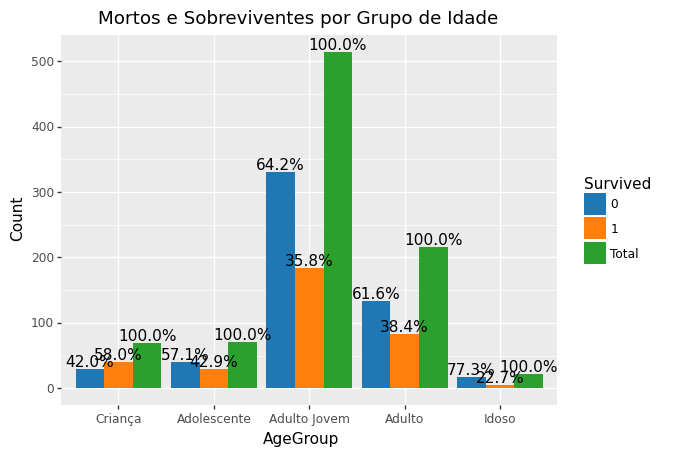

In [180]:
title = 'Mortos e Sobreviventes por Grupo de Idade '
category = 'AgeGroup'
plot = plot_survival_barplot(df_titanic, category, title)
print(plot)

In [181]:
chi2_test_age_group = chi2_contingency(pd.crosstab(df_titanic['AgeGroup'], df_titanic['Survived']))

print(chi2_test_age_group)

pvalue_age_group = chi2_test_age_group[1]


Chi2ContingencyResult(statistic=15.519269633327825, pvalue=0.003736968341386649, dof=4, expected_freq=array([[ 42.51515152,  26.48484848],
       [ 43.13131313,  26.86868687],
       [316.70707071, 197.29292929],
       [133.09090909,  82.90909091],
       [ 13.55555556,   8.44444444]]))


**COMENTÁRIOS:**

O p-value associado aos grupos etários foi de 0,0037, indicando significância estatística. No gráfico acima, é possível observar que de fato existe uma maior taxa de sobrevivência entre os grupos mais jovens, com exceção da transição de "jovem adulto" para "adulto". Esses dois grupos não apresentam uma diferença social tão marcante quanto as demais categorias.

A idade é uma variável contínua, o que torna relevante a aplicação do teste t de Student, conforme mostrado na célula abaixo.

In [182]:
# Faz o ttest para idade e sobrevivência
ttest_age = ttest_ind(df_titanic[df_titanic["Survived"] == 1]["Age"], df_titanic[df_titanic["Survived"] == 0]["Age"], equal_var=False)
print(ttest_age)

TtestResult(statistic=-1.7432399804477365, pvalue=0.08174694936728184, df=675.1129687458936)


**COMENTÁRIOS:**


O teste t retornou um p-value de 0,08, que é maior que o limite convencionado de 0,05 (nível de significância de 5%, ou intervalo de confiança de 95%), indicando que a idade **não** é um fator estatisticamente significativo para a sobrevivência dos indivíduos.

À primeira vista, isso parece contradizer os resultados obtidos na análise por faixas etárias. No entanto, com uma avaliação mais cuidadosa, esse resultado faz sentido. O teste t de Student não leva em consideração categorias, ou seja, todas as idades são tratadas como igualmente influentes no resultado. No caso da análise por grupos etários, as categorias "jovem adulto" e "adulto" abrangem a maior faixa de idades (18 a 60 anos). Dentro dessa faixa, observa-se que adultos têm uma taxa de sobrevivência maior que jovens adultos, enquanto outras categorias indicam que indivíduos mais jovens tendem a ter mais chances de sobrevivência. Essa desproporcionalidade no tamanho das faixas etárias pode ter contribuído para a diferença nos resultados entre as duas análises.

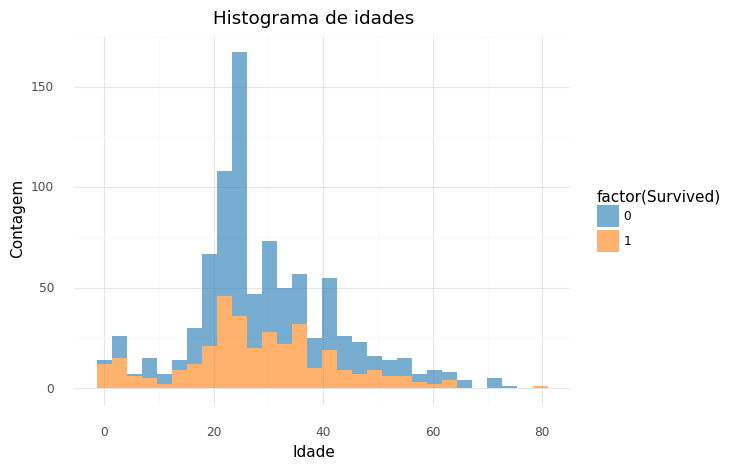

In [183]:
plot = (
    ggplot(df_titanic, aes(x="Age", fill="factor(Survived)"))
    + geom_histogram(bins=30, alpha=0.6)
    + theme_minimal()
    + scale_fill_manual(values=['#1f77b4', '#ff7f0e'])
    + labs(title="Histograma de idades", x="Idade", y="Contagem")
)

print(plot)

Volto a trazer o histograma de idades para ilustrar a proporção de sobreviventes em relação a mortos por idade.

---

#### Sobreviventes por Local de Embarque
- (Varíavel Categórica)

3


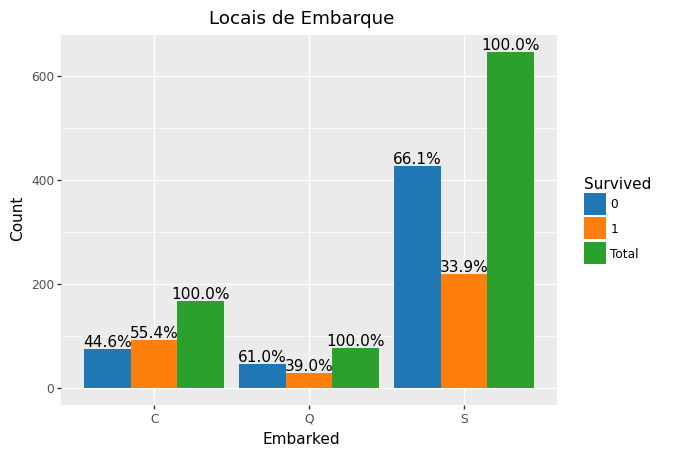

In [184]:
title = 'Locais de Embarque'
category = 'Embarked'
plot = plot_survival_barplot(df_titanic, category, title)
print(plot)

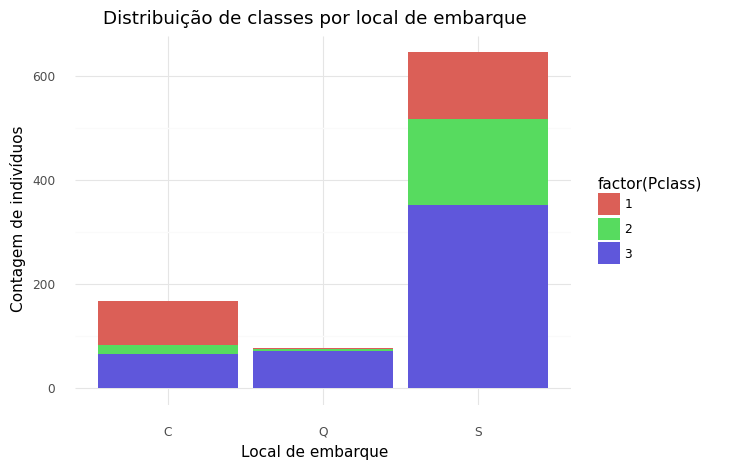

In [185]:
category = 'Embarked'

# Faz um gráfico de barras empilhadas para a Pclass e local de embarque mostrando as contagens
plot = (
    ggplot(df_titanic, aes(x="Embarked", fill="factor(Pclass)"))
    + geom_bar(position="stack")  # Usa contagens em vez de proporções
    + theme_minimal()
    + labs(title="Distribuição de classes por local de embarque", x="Local de embarque", y="Contagem de indivíduos")
)

print(plot)

In [186]:
chi2_test_embarked = chi2_contingency(pd.crosstab(df_titanic['Embarked'], df_titanic['Survived']))

print(chi2_test_embarked)

pvalue_embarked = chi2_test_embarked[1]


Chi2ContingencyResult(statistic=25.964452881874784, pvalue=2.3008626481449577e-06, dof=2, expected_freq=array([[103.51515152,  64.48484848],
       [ 47.44444444,  29.55555556],
       [398.04040404, 247.95959596]]))


**COMENTÁRIOS**

O local de embarque com a maior taxa de sobrevivência foi o C, com 55,4%.

Proporcionalmente, os passageiros que embarcaram no local C incluíam uma quantidade maior de indivíduos da primeira classe, o que sugere uma influência indireta da classe na sobrevivência.

Além disso, o p-value obtido foi de 2,3e-6, evidenciando a significância estatística do local de embarque.

---

#### Distribuição de Tarifas por Sobrevivência
- (Variável contínua)

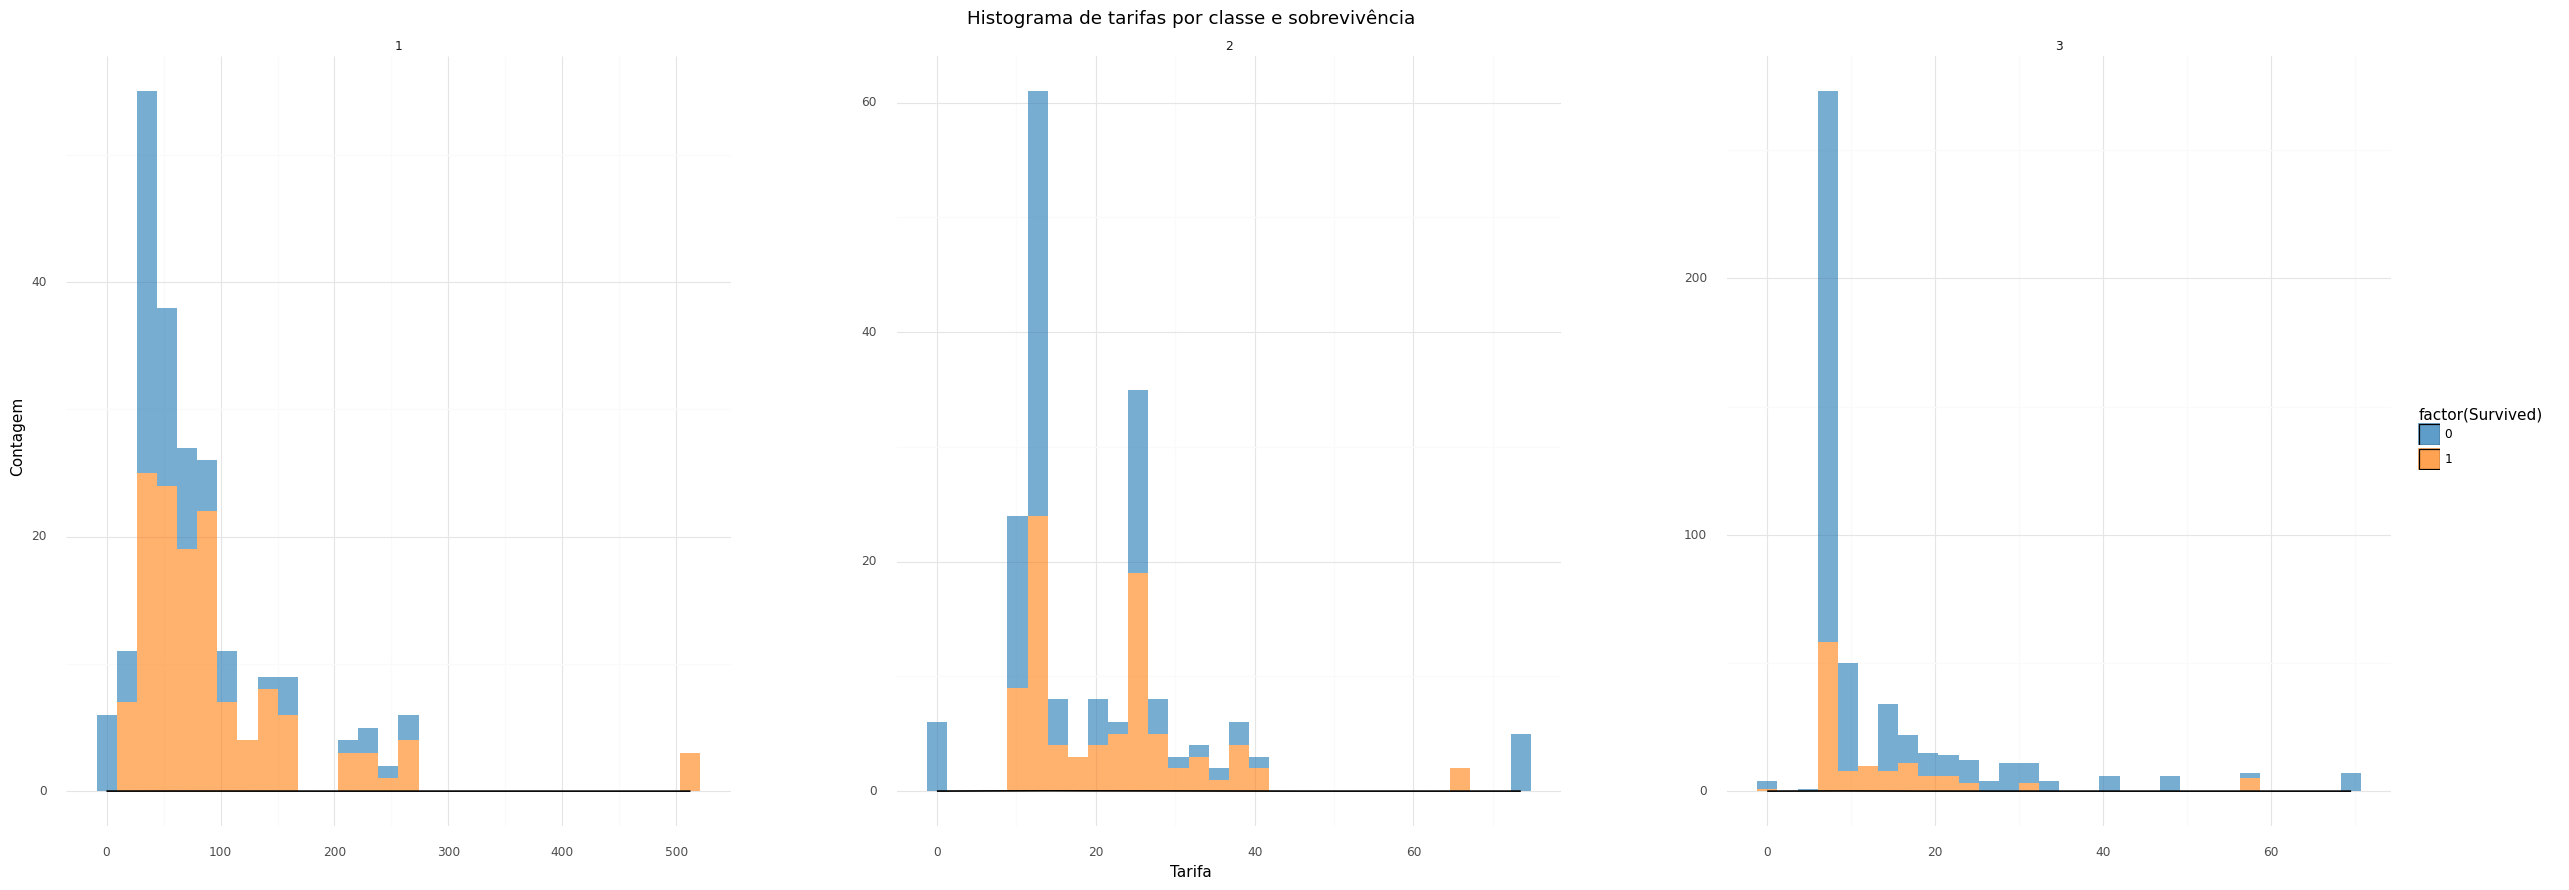

In [187]:
# Plota o hisograma de tarifas por classe e sobrevivência
plot = (
    ggplot(df_titanic, aes(x="Fare", fill="factor(Survived)"))
    + geom_histogram(bins=30, alpha=0.6)
    + facet_wrap("~Pclass", scales='free')
    + geom_density(alpha=0.3, adjust=1.5)
    + theme_minimal()
    + scale_fill_manual(values=['#1f77b4', '#ff7f0e'])
    + labs(title="Histograma de tarifas por classe e sobrevivência", x="Tarifa", y="Contagem")
    + theme(figure_size=(30,10))
    + theme(subplots_adjust={'wspace': 0.25})
)

print(plot)

In [188]:
# Faz o ttest para idade e sobrevivência
ttest_fare = ttest_ind(df_titanic[df_titanic["Survived"] == 1]["Fare"], df_titanic[df_titanic["Survived"] == 0]["Fare"], equal_var=False)
print(ttest_fare)

TtestResult(statistic=6.839099259085254, pvalue=2.6993323503141236e-11, df=436.7022760386057)


**COMENTÁRIOS**

A primeira classe tende a ter a maior faixa de valores de tarifa. Além disso, observa-se que, em geral, quanto maior a tarifa paga, maior a taxa de sobrevivência.

O teste t retornou um p-value de 2,7e-11, indicando que a tarifa é estatisticamente significativa. Além disso, pode-se afirmar que a tarifa atua como um "proxy" para a classe de embarque, uma vez que uma tarifa mais alta geralmente está associada a uma classe mais elevada.

---

#### Avaliação de número de familiares
- (Variável Contínua)

As variáveis `SibSp` (número de irmãos) e `Parch` (número de pais/filhos) foram somadas de modo a compor a compor o número total de familiares de um indivíduo no navio.

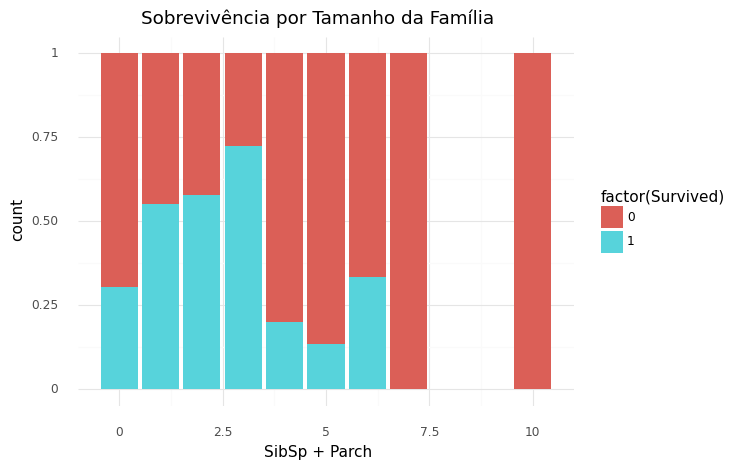

In [189]:
plot = (
    ggplot(df_titanic, aes(x="SibSp + Parch", fill="factor(Survived)"))
    + geom_bar(position="fill")
    + theme_minimal()
    + labs(title="Sobrevivência por Tamanho da Família")
)

print(plot)

In [190]:
# Calcula o ttest para o tamanho da família e sobrevivência
df_titanic["FamilySize"] = df_titanic["SibSp"] + df_titanic["Parch"]
ttest_family_size = ttest_ind(df_titanic[df_titanic["Survived"] == 1]["FamilySize"], df_titanic[df_titanic["Survived"] == 0]["FamilySize"], equal_var=False)
print(ttest_family_size)

TtestResult(statistic=0.5458079235123052, pvalue=0.5853351131843012, df=887.6459975521636)


A partir do gráfico, é possível ter a intuição de que um indivíduo com até 3 familiares tem mais chances de sobrevivência. No entanto, o teste t revela que esta variável não está significativamente relacionada à sobrevivência, dado o alto p-value obtido.

---
### Cálculo de correlação entre variáveis

In [191]:
df_titanic_continuous = df_titanic[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']]

# Converte todas as variávies para o tipo float
df_titanic_continuous = df_titanic_continuous.astype(float)

corr = df_titanic_continuous.corr()

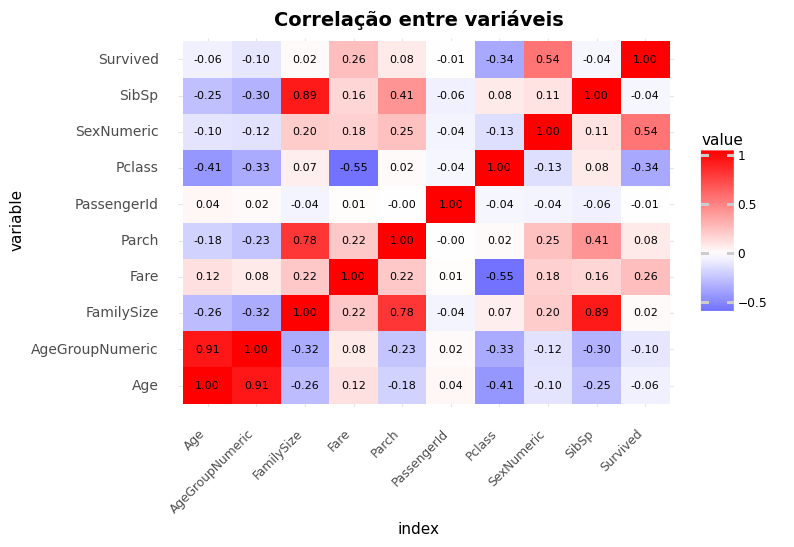

In [192]:
def convert_sex_numeric(df):
    df['SexNumeric'] = df['Sex'].map({'male': 0, 'female': 1})
    return df

# Funçao que converte AgeGroup em um númemoro
def convert_age_group(df):
    df['AgeGroupNumeric'] = df['AgeGroup'].map({'Criança':0, 'Adolescente':1, 'Adulto Jovem':2, 'Adulto':3, 'Idoso':4})
    # casta para inteiro
    df['AgeGroupNumeric'] = df['AgeGroupNumeric'].astype(float)
    return df

df_titanic_continuous = df_titanic.copy(deep=True)

# Converte a variável sexo em numérica (0 para masculino e 1 para feminino)
df_titanic_continuous = convert_sex_numeric(df_titanic_continuous)
df_titanic_continuous = convert_age_group(df_titanic_continuous)

# Calcula a correlação entre as variáveis contínuas
df_correl = df_titanic_continuous.corr()

# Formata os valores para exibição no texto do heatmap
df_correl_melted = df_correl.melt(ignore_index=False).reset_index()
df_correl_melted['formatted_value'] = df_correl_melted['value'].apply(lambda x: f'{x:.2f}')

plot = (
    ggplot(df_correl_melted, aes(x="index", y="variable", fill="value"))
    + geom_tile()
    + geom_text(aes(label='formatted_value'), size=8, color='black')
    + scale_fill_gradient2(low="blue", mid="white", high="red", midpoint=0)
    + labs(title="Correlação entre variáveis")
    + theme_minimal()
    + theme(
        axis_text_x=element_text(rotation=45, hjust=1),
        axis_text_y=element_text(size=10),
        plot_title=element_text(size=14, weight='bold')
    )
)

print(plot)

**COMENTÁRIOS**

A partir da matriz de correlação, é possível observar que as variáveis "Pclass" (classe) e "Fare" (tarifa) são altamente correlacionadas, conforme já mencionado anteriormente.

A primeira linha da matriz mostra a correlação de todas as variáveis com "Survived", que é a variável de interesse deste estudo. As variáveis que mais influenciam a sobrevivência são aquelas com maior valor absoluto do coeficiente de correlação. Destacam-se duas variáveis: sexo e classe. A variável sexo tem o maior valor absoluto, de 0,54, indicando que é a variável que mais influenciou a sobrevivência, o que é corroborado pelos gráficos - mulheres compõem a maior parte dos sobreviventes. Em segundo lugar, está a variável classe. É evidente que indivíduos de classe mais elevada têm maior probabilidade de sobrevivência, indicando que, indiretamente, o fato de uma pessoa ser abastada influenciou suas chances de sobreviver ao desastre. Uma forte evidência desses dois fatores é visível no gráfico que mostra sobreviventes por classe e sexo, onde quase a totalidade dos indivíduos do sexo feminino nas primeiras e segundas classes sobreviveu.

---

### Visualização das variáveis mais relevantes para sobrevivência em um único gráfico

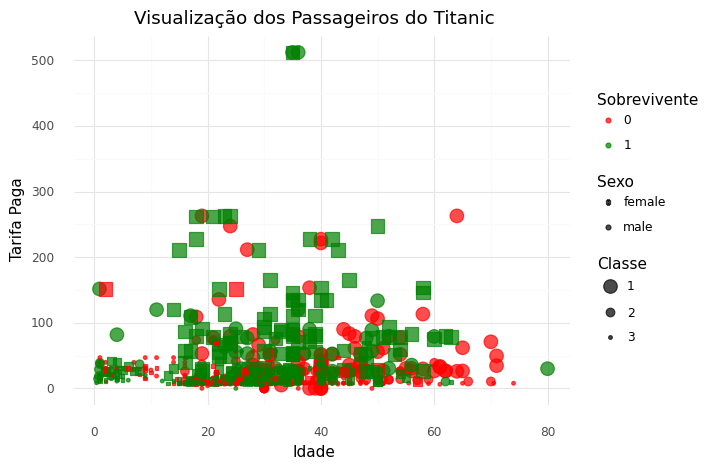

In [193]:
# Gráfico simplificado: Survived como cor e Sex como forma
plot = (ggplot(df_titanic, aes(x='Age', y='Fare', color='factor(Survived)', shape='Sex')) +
        geom_point(aes(size='factor(Pclass)'), alpha=0.7) +  # alpha ajustado para transparência
        scale_color_manual(values={0: 'red', 1: 'green'}, name='Sobrevivente') +
        scale_shape_manual(values={'male': 'o', 'female': 's'}, name='Sexo') +
        scale_size_manual(values={1: 5, 2: 3, 3: 1}, name='Classe') +  # Definindo tamanhos manuais em ordem decrescente
        theme_minimal() +
        labs(title="Visualização dos Passageiros do Titanic",
             x="Idade",
             y="Tarifa Paga",
             color="Sobreviveu",
             shape="Sexo",
             size="Classe"))
print(plot)


---

# Conclusão

## Perguntas levantadas:
- **Quais fatores influenciaram mais a sobrevivência no naufrágio?**
    - O efeito da idade ou gênero na probabilidade de sobrevivência?
    - Qual a relação entre classe social e sobrevivência?


Os experimentos realizados permitiram verificar que existiu uma alta influência de fatores sociais na sobrevivência de um indivíduo no desastre do Titanic.

A pergunta principal levantada no início deste estudo, foi qual é a o fator mais influente na taxa de sobrevivência. Através dos gráficos e resultados, ficou evidente que o sexo é a variável que possui o maior papel, uma vez que este foi o valor que apresentou a maior correlaçao de Pearson com a sobrevivência, assim como o menor p-value no teste de hipótese. Isso também responde a segunda pergunta.

Também verificou-se que existe uma influência muito relevante da classe da passagem do indivíduo, mostrando que dinheiro foi um fator importante, mesmo que indiratamente. Os gráficos mostraram visualizaçoes que trazem fortes evidências para isso. Verificou-se também que numa análise conjunto entre sexo e classe, mulheres da primeira e segunda classe apresentaram uma taxa de sobrevivência muito próxima dos 100%, mostrando uma influência conjunta muito forte.

Por fim, verificou-se que indivíduos mais jovens - crianças e adolescentes - apresentaram uma tendencia maior de sobrevivencia que adultos e idosos.




